In [7]:
#iris data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

iris = load_iris()
X = iris.data[:, :2]  # only first 2 features for visualization
y = iris.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
#exp. with differant values of k
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f"K={k} → Accuracy: {accuracy_score(y_test, y_pred):.3f}")


K=1 → Accuracy: 0.700
K=3 → Accuracy: 0.833
K=5 → Accuracy: 0.767
K=7 → Accuracy: 0.800
K=9 → Accuracy: 0.833


Accuracy: 0.833
CM:
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


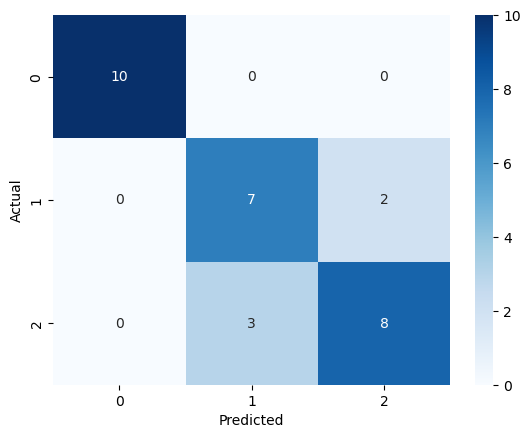

In [10]:
#evaluate model
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print("CM:")
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


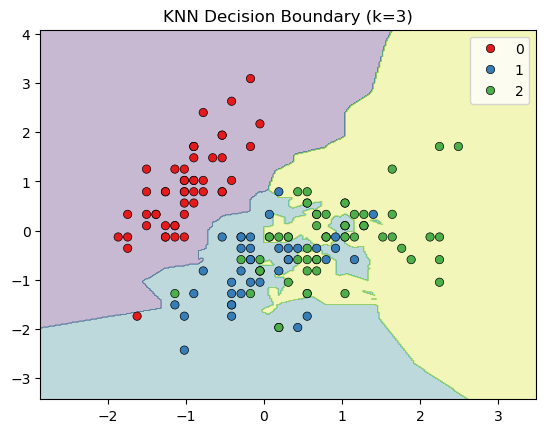

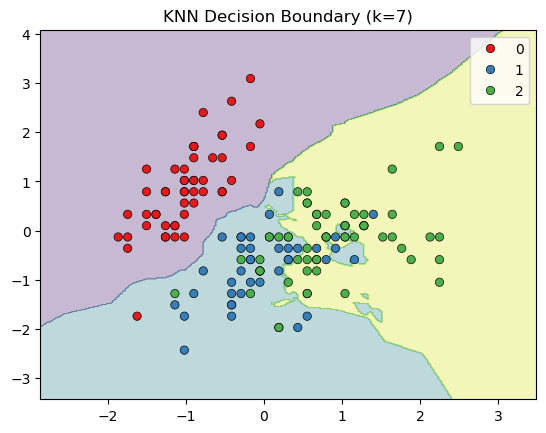

In [11]:
#
def plot_decision_boundary(X, y, k):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor="k")
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.show()


plot_decision_boundary(X, y, k=3)
plot_decision_boundary(X, y, k=7)
